In [121]:
import pandas as pd
import numpy as np

In [122]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [123]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [124]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [125]:
import matplotlib.pyplot as plt

In [126]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [127]:
Y = df.target
X = df.iloc[:, :-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [128]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


# Choose any one method from the following

## Information gain

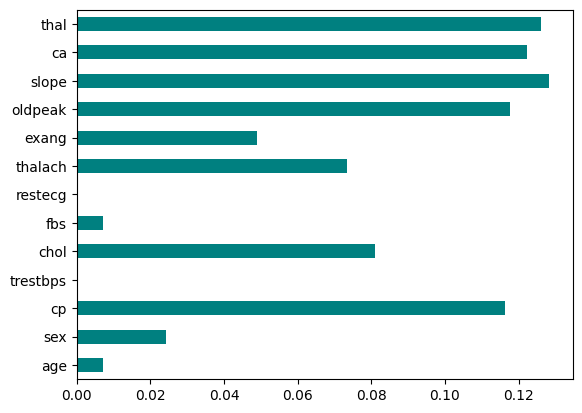

In [129]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

imp = mutual_info_classif(X, Y)
feat_imp = pd.Series(imp,df.columns[0:len(df.columns)-1]) #measurinng information gain of each column
feat_imp.plot(kind='barh', color = "teal")
plt.show()

In [130]:
feat_imp #Manually checked information gain for feature selection
#Remove those which have least information gain

age         0.007015
sex         0.024234
cp          0.116263
trestbps    0.000000
chol        0.081000
fbs         0.007112
restecg     0.000000
thalach     0.073378
exang       0.048899
oldpeak     0.117558
slope       0.128279
ca          0.122375
thal        0.125963
dtype: float64

## Chi Square tett

In [131]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
chi2_fea = SelectKBest(chi2, k=10)  # k = number of features have to be selected
X_kbest_fea = chi2_fea.fit_transform(X_cat, Y)  #selected feature array using chi square test
print('Ori. fea. no.: ', X_cat.shape[1]) #print original number of features
print('Red. fea. no.: ', X_kbest_fea.shape[1]) # print reduced number of features

Ori. fea. no.:  13
Red. fea. no.:  10


In [132]:
X_cat  #Original features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2,0,0,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2
2,41,0,1,130,204,0,0,172,0,1,2,0,2
3,56,1,1,120,236,0,1,178,0,0,2,0,2
4,57,0,0,120,354,0,1,163,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3
299,45,1,3,110,264,0,1,132,0,1,1,0,3
300,68,1,0,144,193,1,1,141,0,3,1,2,3
301,57,1,0,130,131,0,1,115,1,1,1,1,3


In [133]:
X_kbest_fea   #selected feature array using chi square test

array([[63,  1,  3, ...,  2,  0,  0],
       [37,  1,  2, ...,  3,  0,  0],
       [41,  0,  1, ...,  1,  2,  0],
       ...,
       [68,  1,  0, ...,  3,  1,  2],
       [57,  1,  0, ...,  1,  1,  1],
       [57,  0,  1, ...,  0,  1,  1]])

## Correlation

<AxesSubplot: >

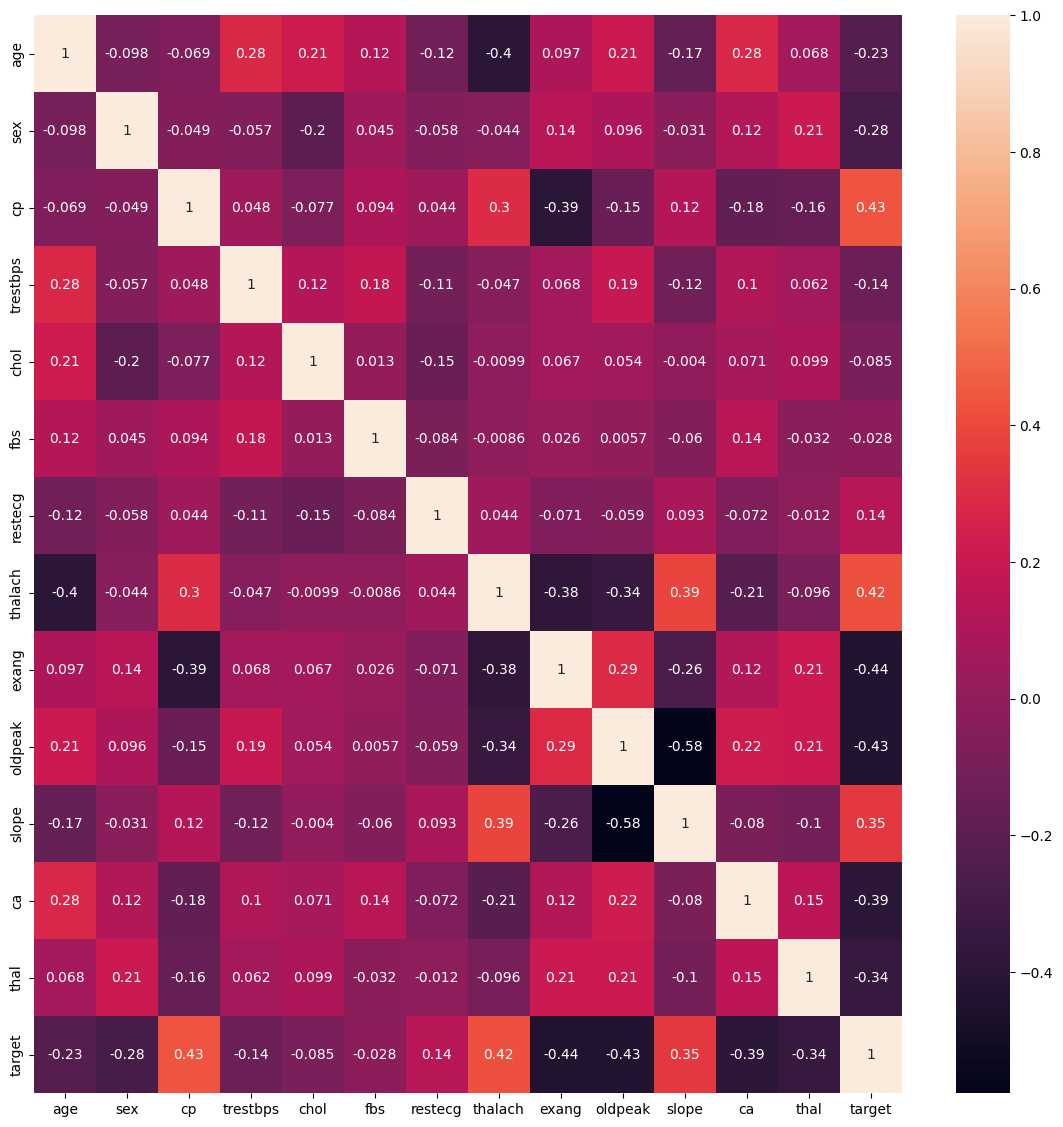

In [134]:
import seaborn as sns
cor = df.corr() #get correlation

plt.figure(figsize=(14,14))
sns.heatmap(cor, annot=True) #heatmap to for visual representation of correlation

# Choose those features which have highter correlation with target i.e. cor >= |0.5|
# and less correlation between them i.e. cor < |0.5|